In [5]:
!pip install statsmodels scipy

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import io
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import autocorrelation_plot

In [13]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [14]:
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols_to_convert:
    df[col] = df[col].astype(float)
    print("Tipos de Dados após a conversão:")
df.info()


Tipos de Dados após a conversão:
Tipos de Dados após a conversão:
Tipos de Dados após a conversão:
Tipos de Dados após a conversão:
Tipos de Dados após a conversão:
Tipos de Dados após a conversão:
Tipos de Dados após a conversão:
<class 'pandas.core.frame.DataFrame'>
Index: 178851 entries, 0 to 178859
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   178851 non-null  object 
 1   Time                   178851 non-null  object 
 2   Global_active_power    178851 non-null  float64
 3   Global_reactive_power  178851 non-null  float64
 4   Voltage                178851 non-null  float64
 5   Global_intensity       178851 non-null  float64
 6   Sub_metering_1         178851 non-null  float64
 7   Sub_metering_2         178851 non-null  float64
 8   Sub_metering_3         178851 non-null  float64
dtypes: float64(7), object(2)
memory usage: 13.6+ MB


##Exercício 1

In [15]:
print(df.head(10))

1. Primeiras 10 linhas:
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4      

## Exercício 2


In [21]:
print("Diferença entre as variáveis:")
print("Global_active_power: potência ativa consumida efetivamente (kW).")
print("Global_reactive_power: potência reativa, que circula no sistema sem realizar trabalho útil (kW).")

Diferença entre as variáveis:
Global_active_power: potência ativa consumida efetivamente (kW).
Global_reactive_power: potência reativa, que circula no sistema sem realizar trabalho útil (kW).


## Exercício 3

In [23]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
AnoMes                   0
dtype: int64


#Exercício 4

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Dia_semana'] = df['Date'].dt.day_name()
print(df[['Dia_semana','Date']].head())

  Dia_semana       Date
0   Saturday 2006-12-16
1   Saturday 2006-12-16
2   Saturday 2006-12-16
3   Saturday 2006-12-16
4   Saturday 2006-12-16


## Exercício 5

In [ ]:
df_2007 = df[df['Date'].dt.year == 2007]
daily_avg = df_2007.groupby(df_2007['Date'].dt.date)['Global_active_power'].mean()
print(daily_avg.head())

Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


#Exercício 6

/tmp/ipython-input-3170316897.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


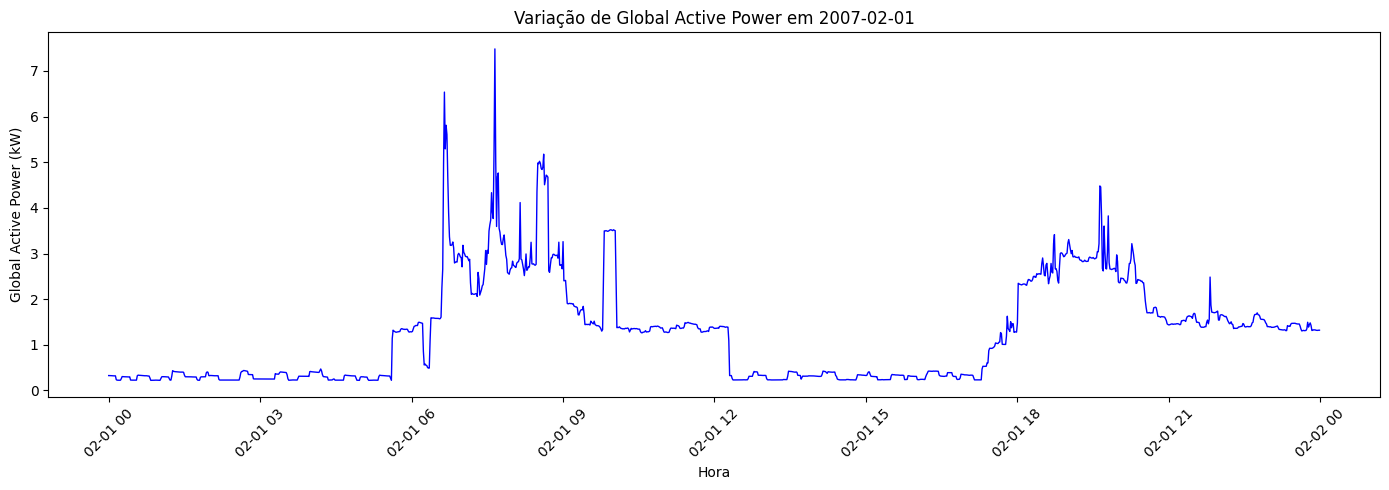

In [18]:
dia_escolhido = "2007-02-01"

df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df_dia = df[df['DateTime'].dt.strftime('%Y-%m-%d') == dia_escolhido]


plt.figure(figsize=(14,5))
plt.plot(df_dia['DateTime'], df_dia['Global_active_power'], color='blue', linewidth=1)
plt.title(f"Variação de Global Active Power em {dia_escolhido}")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Exercício 7

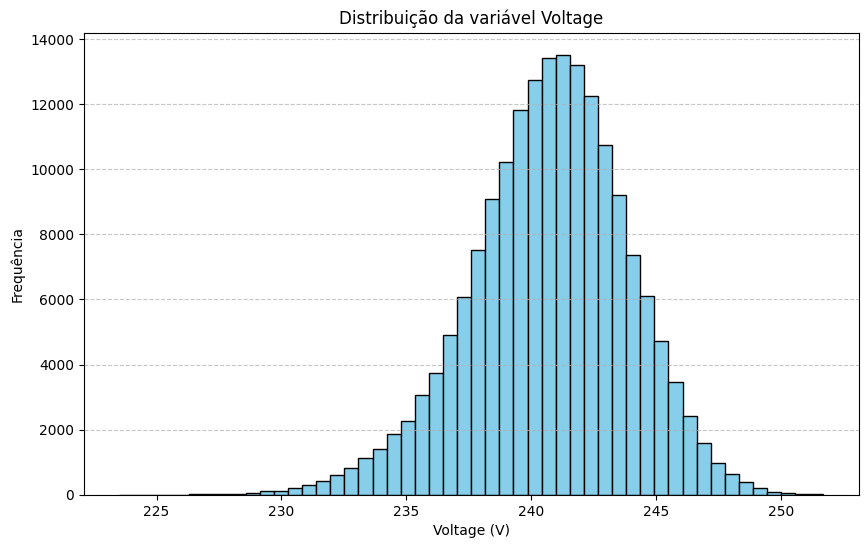

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df['Voltage'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribuição da variável Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O que pode ser observado:

A distribuição do Voltage costuma ser próxima de normal (gaussiana), mas deslocada para a direita levemente.

A maior parte dos valores fica concentrada entre 230V e 245V, mostrando que o sistema opera dentro de uma faixa relativamente estável.

Podem aparecer caudas pequenas em valores mais baixos (~220V) ou mais altos (~250V), indicando oscilações ocasionais na rede elétrica.

#Exercício 8

/tmp/ipython-input-4193664004.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


Consumo médio por mês:
AnoMes
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.889948
Freq: M, Name: Global_active_power, dtype: float64


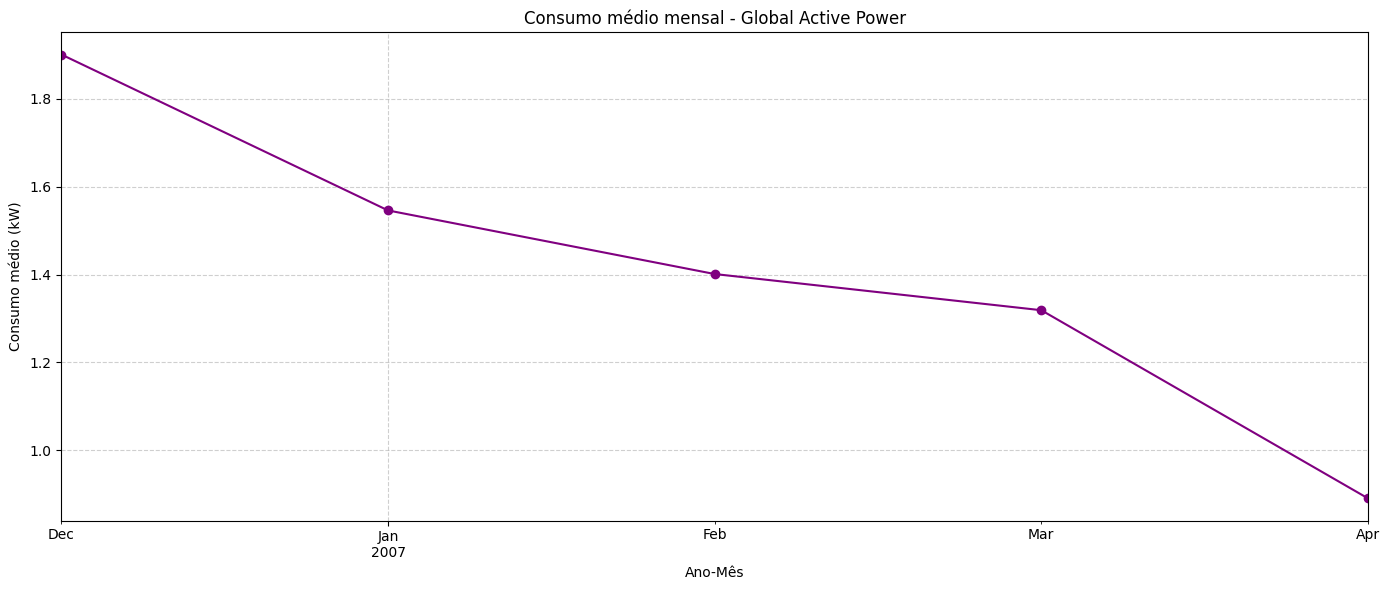

In [20]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df['AnoMes'] = df['DateTime'].dt.to_period('M')

consumo_mensal = df.groupby('AnoMes')['Global_active_power'].mean()

print("Consumo médio por mês:")
print(consumo_mensal)

plt.figure(figsize=(14,6))
consumo_mensal.plot(kind='line', marker='o', color='purple')
plt.title("Consumo médio mensal - Global Active Power")
plt.xlabel("Ano-Mês")
plt.ylabel("Consumo médio (kW)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Exercício 9

/tmp/ipython-input-3038695612.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


O dia com maior consumo foi 2006-12-23, com 4773.39 kW de energia ativa consumida.


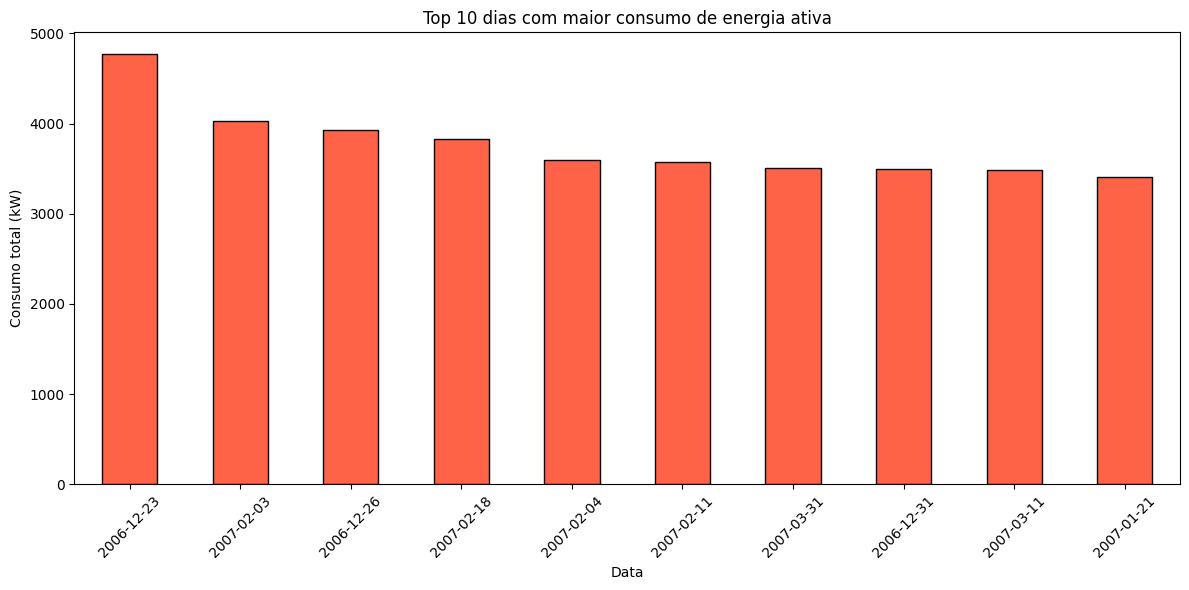

In [25]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df['Data'] = df['DateTime'].dt.date

consumo_diario = df.groupby('Data')['Global_active_power'].sum()

dia_max_consumo = consumo_diario.idxmax()
valor_max_consumo = consumo_diario.max()

print(f"O dia com maior consumo foi {dia_max_consumo}, com {valor_max_consumo:.2f} kW de energia ativa consumida.")

top10 = consumo_diario.sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top10.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Top 10 dias com maior consumo de energia ativa")
plt.xlabel("Data")
plt.ylabel("Consumo total (kW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Exercício 10

/tmp/ipython-input-659652986.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


Consumo médio de Global Active Power:
TipoDia
Final de Semana    1.801490
Semana             1.241139
Name: Global_active_power, dtype: float64


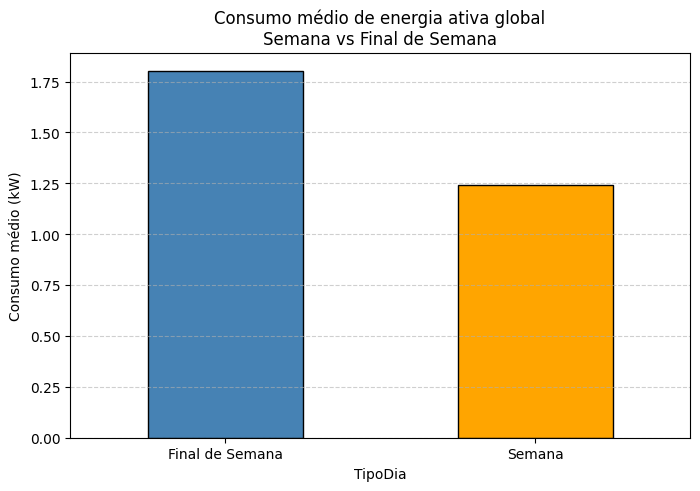

In [26]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df['DiaSemana'] = df['DateTime'].dt.dayofweek
df['TipoDia'] = df['DiaSemana'].apply(lambda x: 'Final de Semana' if x >= 5 else 'Semana')

consumo_tipo = df.groupby('TipoDia')['Global_active_power'].mean()

print("Consumo médio de Global Active Power:")
print(consumo_tipo)

plt.figure(figsize=(8,5))
consumo_tipo.plot(kind='bar', color=['steelblue', 'orange'], edgecolor='black')
plt.title("Consumo médio de energia ativa global\nSemana vs Final de Semana")
plt.ylabel("Consumo médio (kW)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Exercício 11

Matriz de correlação:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.276337 -0.596566   
Global_reactive_power             0.276337               1.000000 -0.160827   
Voltage                          -0.596566              -0.160827  1.000000   
Global_intensity                  0.999108               0.288728 -0.602492   

                       Global_intensity  
Global_active_power            0.999108  
Global_reactive_power          0.288728  
Voltage                       -0.602492  
Global_intensity               1.000000  


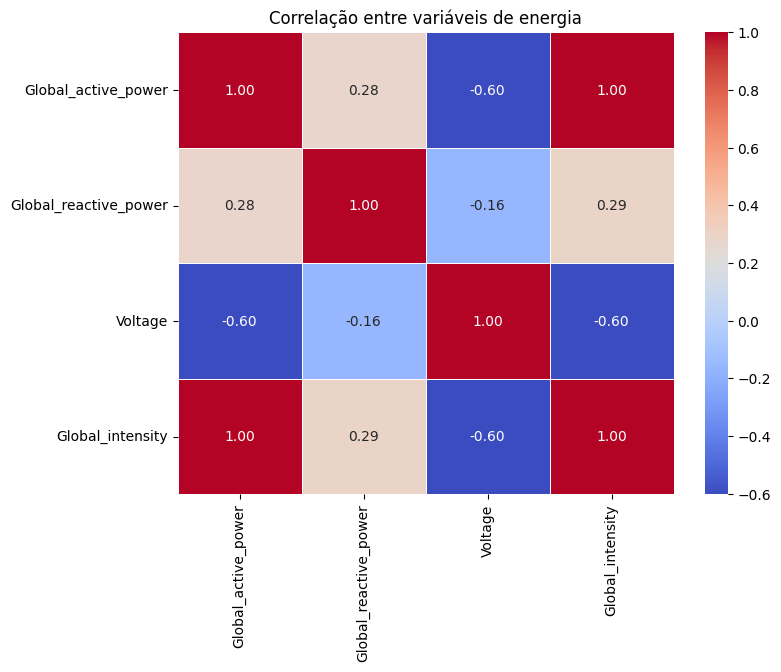

In [28]:
variaveis = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

correlacoes = df[variaveis].corr()

print("Matriz de correlação:")
print(correlacoes)

plt.figure(figsize=(8,6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação entre variáveis de energia")
plt.show()

#Exercício 12

In [29]:
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head())

   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0


#Exercício 13

/tmp/ipython-input-327305431.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


Médias mensais:
         Total_Sub_metering  Global_active_power
AnoMes                                          
2006-12           10.873181             1.901295
2007-01           10.423518             1.546034
2007-02            9.486135             1.401084
2007-03           10.212863             1.318627
2007-04            6.691315             0.889948

Meses em que Total_Sub_metering ultrapassou a média de Global_active_power:
         Total_Sub_metering  Global_active_power
AnoMes                                          
2006-12           10.873181             1.901295
2007-01           10.423518             1.546034
2007-02            9.486135             1.401084
2007-03           10.212863             1.318627
2007-04            6.691315             0.889948


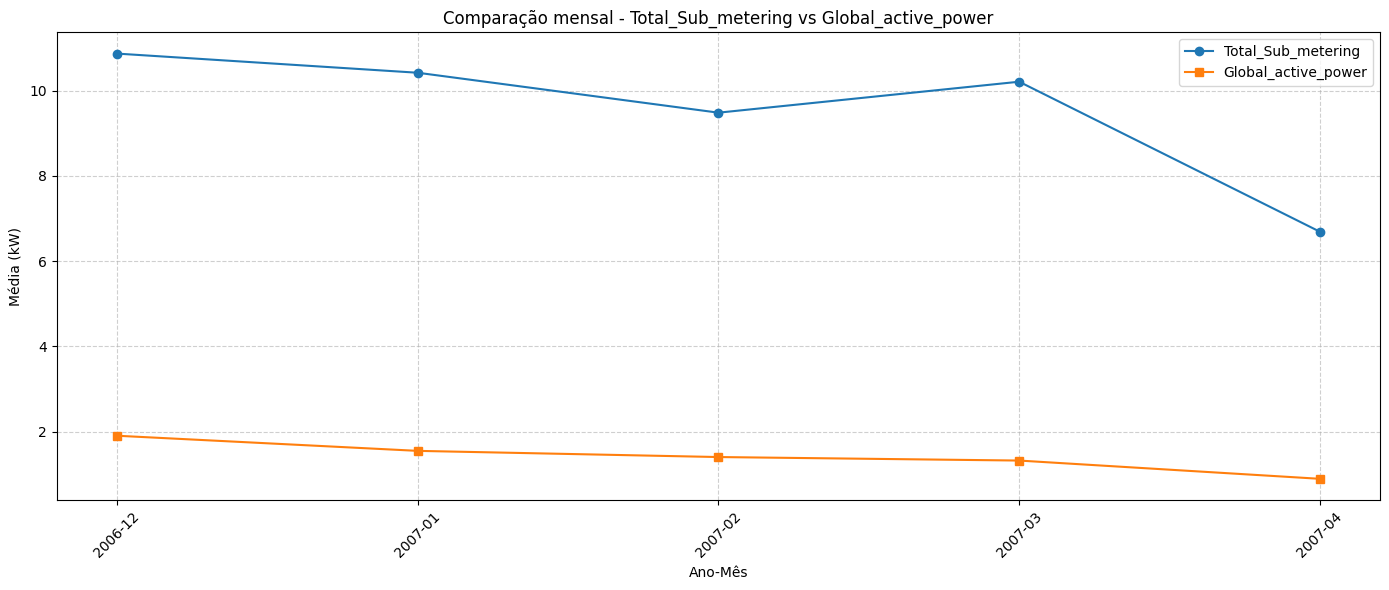

In [30]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df['AnoMes'] = df['DateTime'].dt.to_period('M')

media_mensal = df.groupby('AnoMes')[['Total_Sub_metering', 'Global_active_power']].mean()

print("Médias mensais:")
print(media_mensal.head())

meses_ultrapassados = media_mensal[media_mensal['Total_Sub_metering'] > media_mensal['Global_active_power']]

print("\nMeses em que Total_Sub_metering ultrapassou a média de Global_active_power:")
print(meses_ultrapassados)

plt.figure(figsize=(14,6))
plt.plot(media_mensal.index.astype(str), media_mensal['Total_Sub_metering'], label="Total_Sub_metering", marker='o')
plt.plot(media_mensal.index.astype(str), media_mensal['Global_active_power'], label="Global_active_power", marker='s')
plt.title("Comparação mensal - Total_Sub_metering vs Global_active_power")
plt.xlabel("Ano-Mês")
plt.ylabel("Média (kW)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Exercício 14

In [36]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], dayfirst=True)

df_2008 = df[df['DateTime'].dt.year == 2008]

print(f"Número de registros em 2008: {len(df_2008)}")

if len(df_2008):
    df_2008_diario = df_2008.resample('D', on='DateTime')['Voltage'].mean()

    # Gráfico de série temporal diário
    plt.figure(figsize=(14,6))
    df_2008_diario.plot(color='green', linewidth=1)
    plt.title("Média diária de Voltage em 2008")
    plt.xlabel("Data")
    plt.ylabel("Voltage (V)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Não há registros para o ano de 2008 no dataset.")


Número de registros em 2008: 0
Não há registros para o ano de 2008 no dataset.


#Exercício 15

Consumo médio de Global_active_power por estação (hemisfério norte):
Estacao
Inverno    1.564443
Name: Global_active_power, dtype: float64


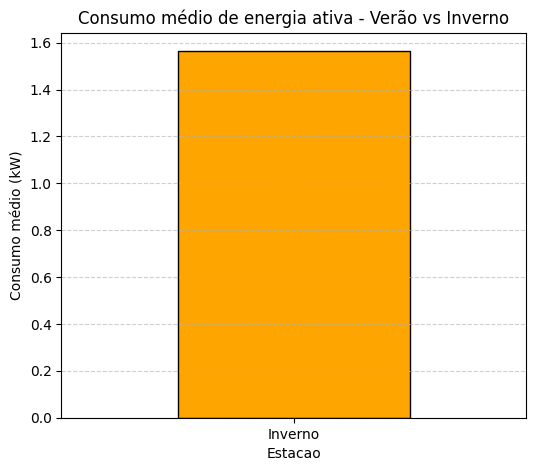

In [37]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], dayfirst=True)
df['Mes'] = df['DateTime'].dt.month

def estacao_hemisferio_norte(mes):
    if mes in [6, 7, 8]:
        return 'Verão'
    elif mes in [12, 1, 2]:
        return 'Inverno'
    else:
        return 'Outras Estações'

df['Estacao'] = df['Mes'].apply(estacao_hemisferio_norte)
df_verao_inverno = df[df['Estacao'].isin(['Verão','Inverno'])]

consumo_estacao = df_verao_inverno.groupby('Estacao')['Global_active_power'].mean()

print("Consumo médio de Global_active_power por estação (hemisfério norte):")
print(consumo_estacao)

plt.figure(figsize=(6,5))
consumo_estacao.plot(kind='bar', color=['orange','blue'], edgecolor='black')
plt.title("Consumo médio de energia ativa - Verão vs Inverno")
plt.ylabel("Consumo médio (kW)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Exercício 16

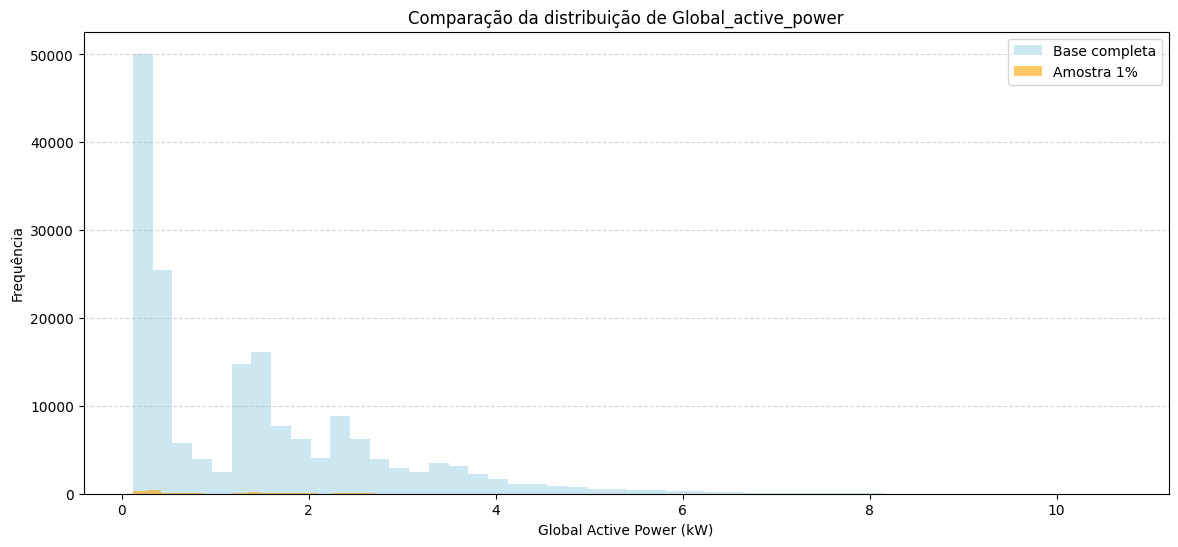

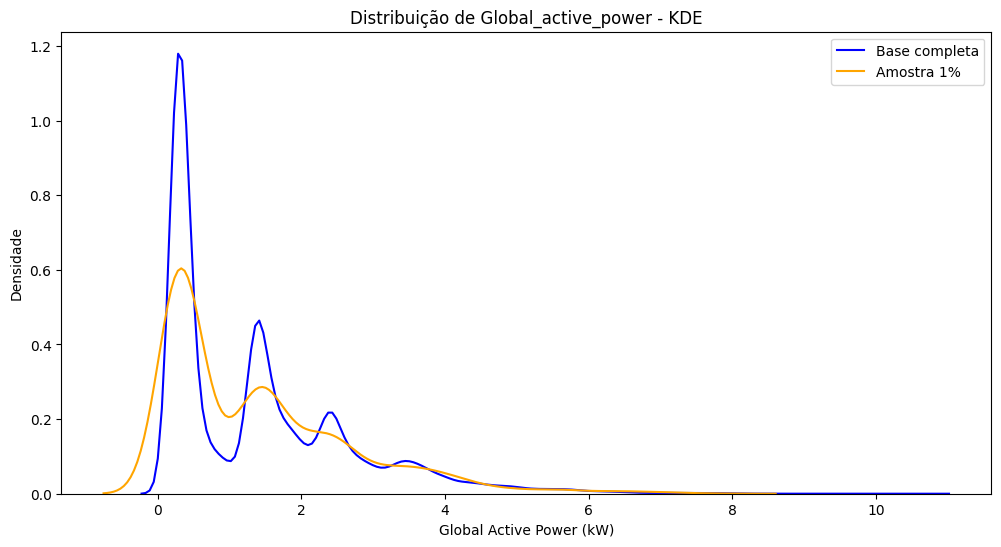

In [41]:
df_amostra = df.sample(frac=0.01, random_state=42)  # random_state garante reprodutibilidade

plt.figure(figsize=(14,6))
plt.hist(df['Global_active_power'], bins=50, color='lightblue', alpha=0.6, label='Base completa')
plt.hist(df_amostra['Global_active_power'], bins=50, color='orange', alpha=0.6, label='Amostra 1%')
plt.title("Comparação da distribuição de Global_active_power")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequência")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

import seaborn as sns

plt.figure(figsize=(12,6))
sns.kdeplot(df['Global_active_power'], label='Base completa', color='blue')
sns.kdeplot(df_amostra['Global_active_power'], label='Amostra 1%', color='orange')
plt.title("Distribuição de Global_active_power - KDE")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Densidade")
plt.legend()
plt.show()

#Exercício 17

In [43]:
variaveis_numericas = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
                       'Sub_metering_3', 'Total_Sub_metering']

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[variaveis_numericas] = scaler.fit_transform(df[variaveis_numericas])

print(df_scaled[variaveis_numericas].head())

   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             0.388130               0.478261  0.402340          0.388646   
1             0.496587               0.498856  0.359447          0.489083   
2             0.497914               0.569794  0.347395          0.489083   
3             0.499242               0.574371  0.363346          0.489083   
4             0.335988               0.604119  0.432116          0.331878   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering  
0             0.0        0.012821            0.85            0.142857  
1             0.0        0.012821            0.80            0.134921  
2             0.0        0.025641            0.85            0.150794  
3             0.0        0.012821            0.85            0.142857  
4             0.0        0.012821            0.85            0.142857  


#Exercício 18

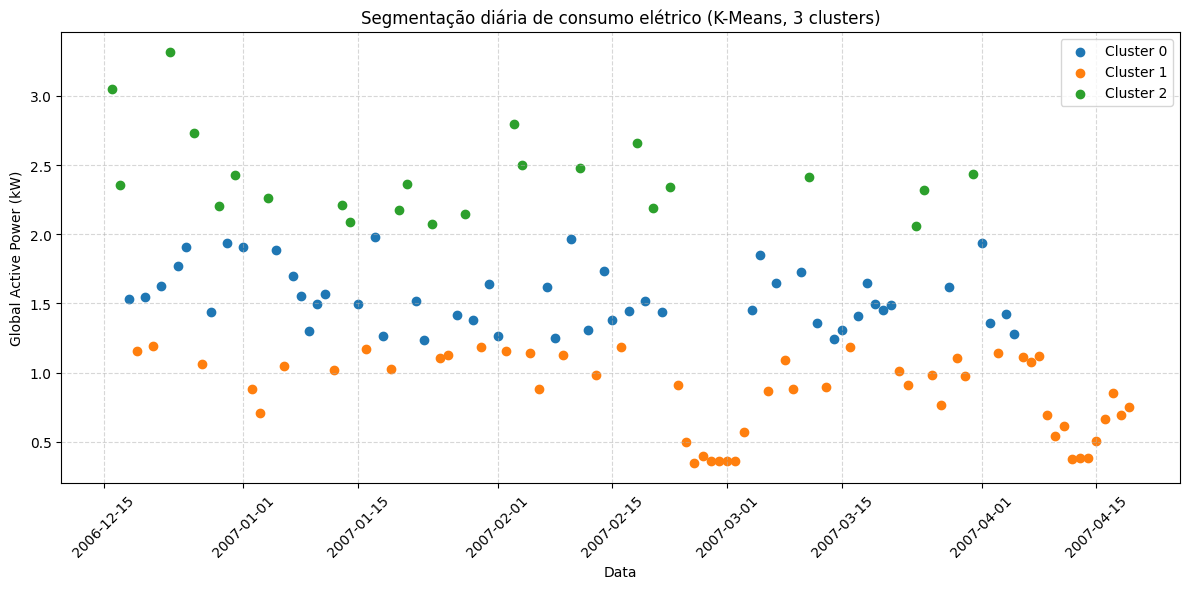

In [45]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], dayfirst=True)
df['Data'] = df['DateTime'].dt.date
consumo_diario = df.groupby('Data')[['Global_active_power']].mean()

scaler = StandardScaler()
consumo_diario_scaled = scaler.fit_transform(consumo_diario)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(consumo_diario_scaled)

consumo_diario['Cluster'] = clusters

plt.figure(figsize=(12,6))

for cluster in range(3):
    df_cluster = consumo_diario[consumo_diario['Cluster']==cluster]
    plt.scatter(df_cluster.index, df_cluster['Global_active_power'], label=f'Cluster {cluster}')

plt.title("Segmentação diária de consumo elétrico (K-Means, 3 clusters)")
plt.xlabel("Data")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Cluster com menor média - dias de consumo baixo, possivelmente finais de semana ou feriados.

Cluster intermediário - dias normais de semana com consumo moderado.

Cluster com maior média - dias de consumo alto, podendo indicar dias de maior atividade na residência ou picos de uso.

#Exercício 19

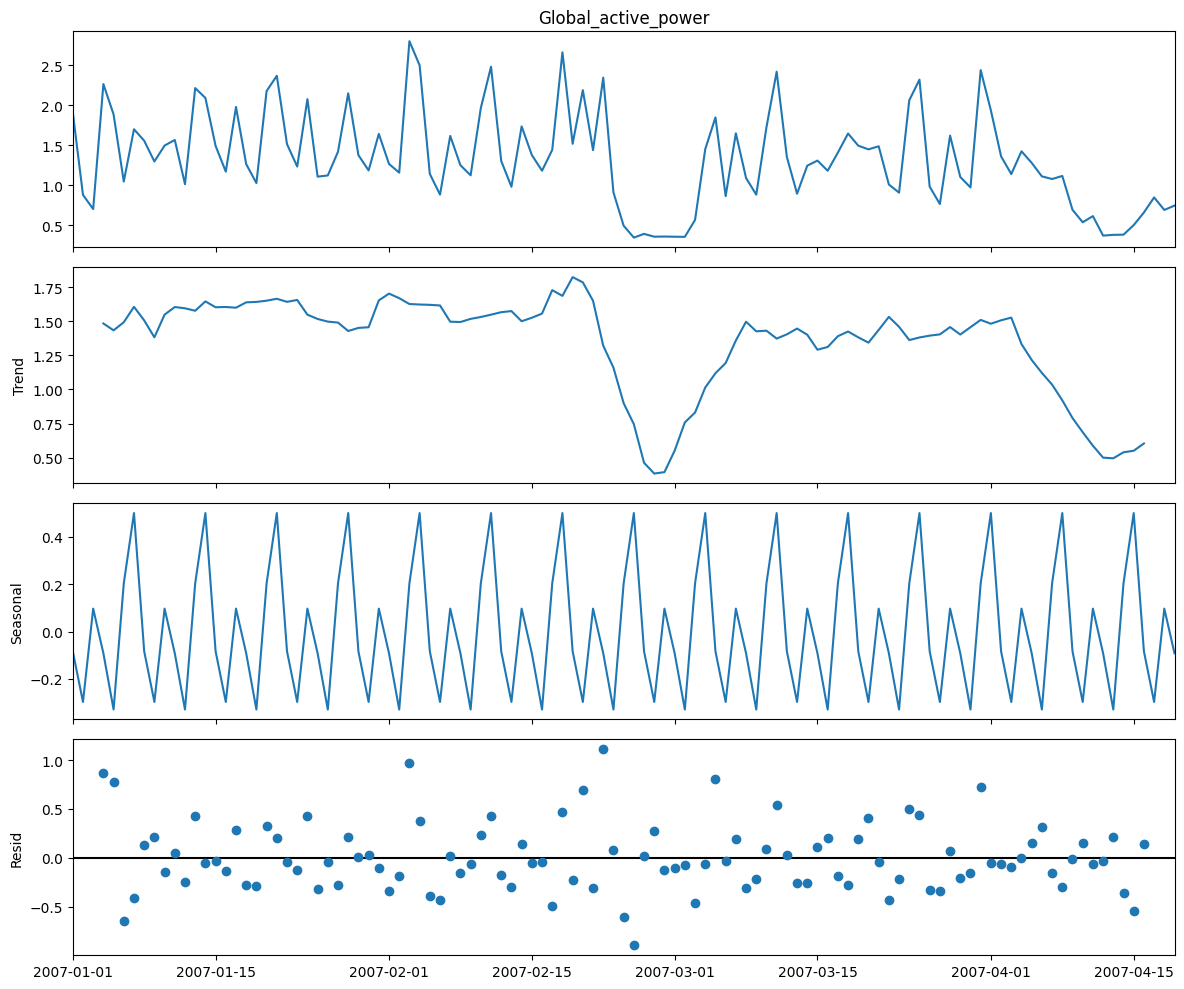

In [48]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], dayfirst=True)
df_6meses = df[(df['DateTime'] >= '2007-01-01') & (df['DateTime'] <= '2007-06-30')]

ts = df_6meses.set_index('DateTime')['Global_active_power']
ts_diario = ts.resample('D').mean()

decomposicao = seasonal_decompose(ts_diario, model='additive')

plt.rcParams.update({'figure.figsize': (12,10)})
decomposicao.plot()
plt.show()

#Exercício 20

Coeficiente angular (slope): 0.2368
Intercepto: -0.0021
Erro médio quadrático (MSE): 0.0030
Raiz do erro médio quadrático (RMSE): 0.0548


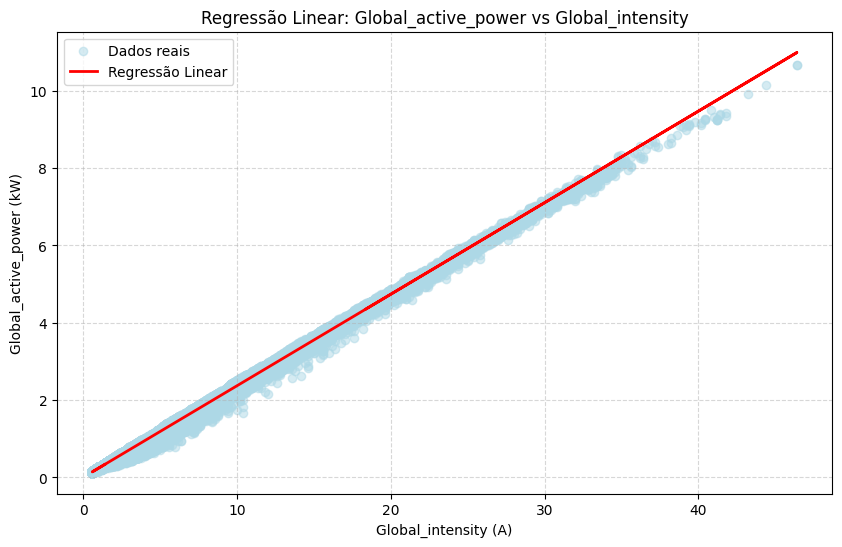

In [49]:
X = df[['Global_intensity']]
y = df['Global_active_power']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Coeficiente angular (slope): {modelo.coef_[0]:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")
print(f"Erro médio quadrático (MSE): {mse:.4f}")
print(f"Raiz do erro médio quadrático (RMSE): {rmse:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='lightblue', alpha=0.5, label='Dados reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title("Regressão Linear: Global_active_power vs Global_intensity")
plt.xlabel("Global_intensity (A)")
plt.ylabel("Global_active_power (kW)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Exercício 21


Consumo médio por hora do dia:
Hora
0     0.988117
1     0.838539
2     0.728448
3     0.681715
4     0.664677
5     0.710400
6     1.089825
7     1.808058
8     1.795779
9     1.604945
10    1.482529
11    1.340007
12    1.270673
13    1.193327
14    1.212458
15    1.238520
16    1.235779
17    1.393938
18    1.885454
19    2.473633
20    2.441558
21    2.391936
22    1.814823
23    1.297780
Name: Global_active_power, dtype: float64

Hora de maior consumo médio: 19h com 2.47 kW


/tmp/ipython-input-464716602.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_horario = df.set_index('DateTime').resample('H')['Global_active_power'].mean()


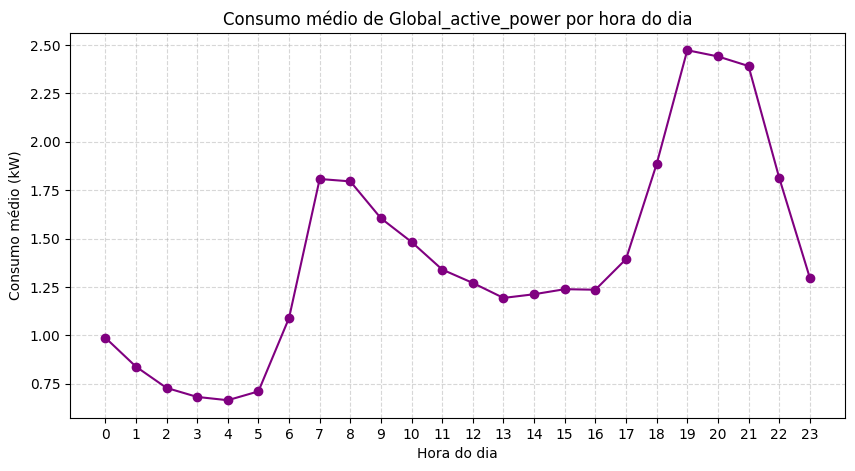

In [51]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], dayfirst=True)
df_horario = df.set_index('DateTime').resample('H')['Global_active_power'].mean()
df_horario = df_horario.reset_index()
df_horario['Hora'] = df_horario['DateTime'].dt.hour
consumo_por_hora = df_horario.groupby('Hora')['Global_active_power'].mean()

print("Consumo médio por hora do dia:")
print(consumo_por_hora)

hora_max_consumo = consumo_por_hora.idxmax()
valor_max_consumo = consumo_por_hora.max()
print(f"\nHora de maior consumo médio: {hora_max_consumo}h com {valor_max_consumo:.2f} kW")

plt.figure(figsize=(10,5))
consumo_por_hora.plot(kind='line', marker='o', color='purple')
plt.title("Consumo médio de Global_active_power por hora do dia")
plt.xlabel("Hora do dia")
plt.ylabel("Consumo médio (kW)")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Exercício 22

Autocorrelação com lag de 1h: 0.767
Autocorrelação com lag de 24h: 0.377
Autocorrelação com lag de 48h: 0.310


/tmp/ipython-input-3489023851.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_horaria = df.set_index('DateTime').resample('H')['Global_active_power'].mean()


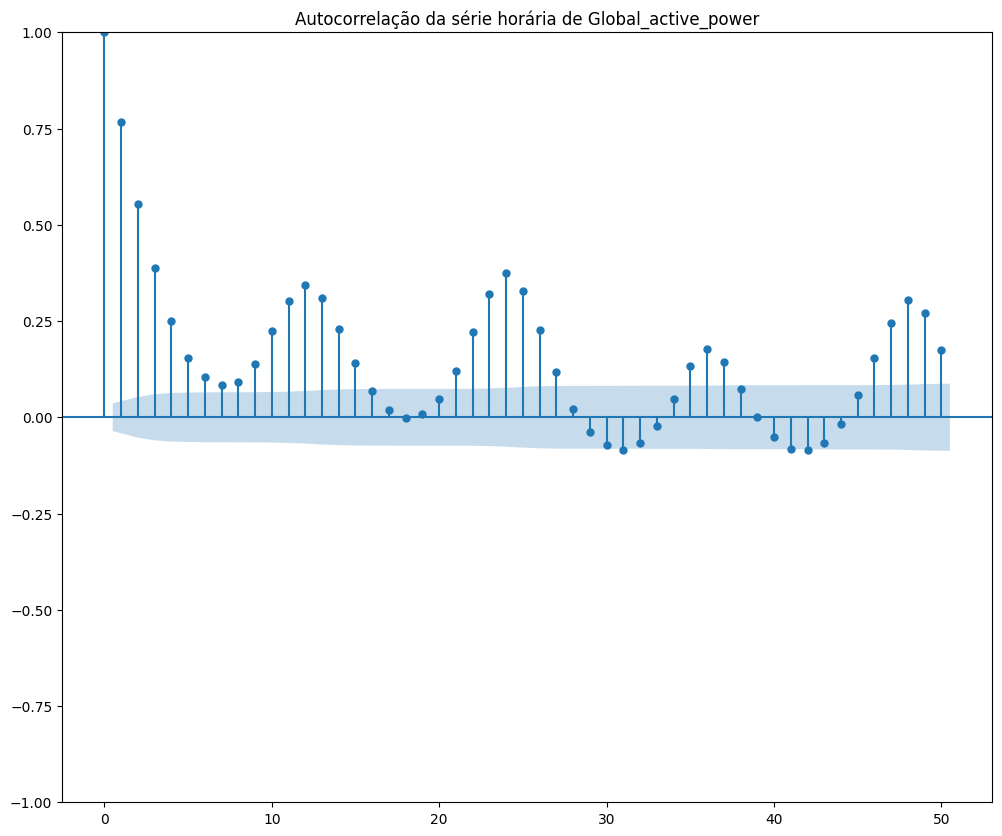

In [52]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], dayfirst=True)

ts_horaria = df.set_index('DateTime').resample('H')['Global_active_power'].mean()

lag_1h = ts_horaria.autocorr(lag=1)
lag_24h = ts_horaria.autocorr(lag=24)
lag_48h = ts_horaria.autocorr(lag=48)

print(f"Autocorrelação com lag de 1h: {lag_1h:.3f}")
print(f"Autocorrelação com lag de 24h: {lag_24h:.3f}")
print(f"Autocorrelação com lag de 48h: {lag_48h:.3f}")

sm.graphics.tsa.plot_acf(ts_horaria, lags=50)
plt.title("Autocorrelação da série horária de Global_active_power")
plt.show()

Podemos concluir que existem padrões repetidos diariamente, visto que a correlação foi significantemente positiva.

## Exercício 23

Variância explicada por cada componente:
Componente 1: 0.65 (64.9%)
Componente 2: 0.22 (22.4%)


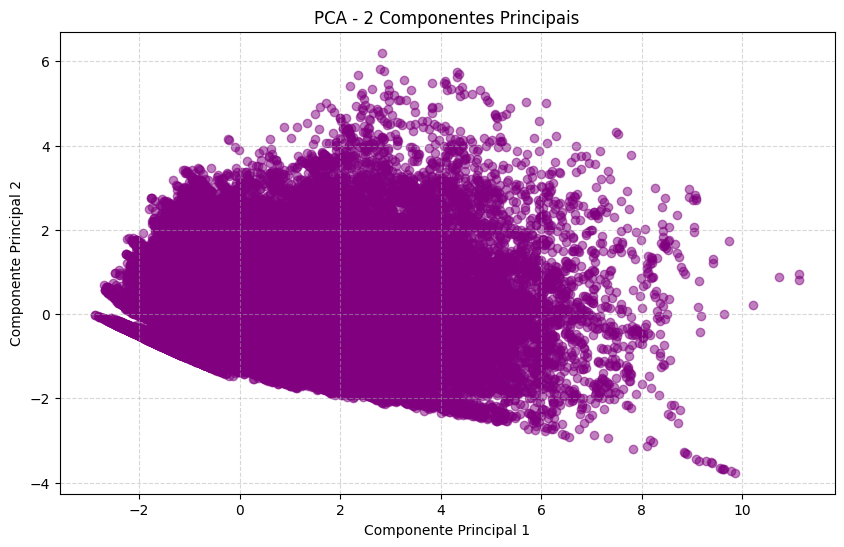

In [53]:
variaveis = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
X = df[variaveis]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.2f} ({var*100:.1f}%)")

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='purple')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - 2 Componentes Principais")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Exercício 24

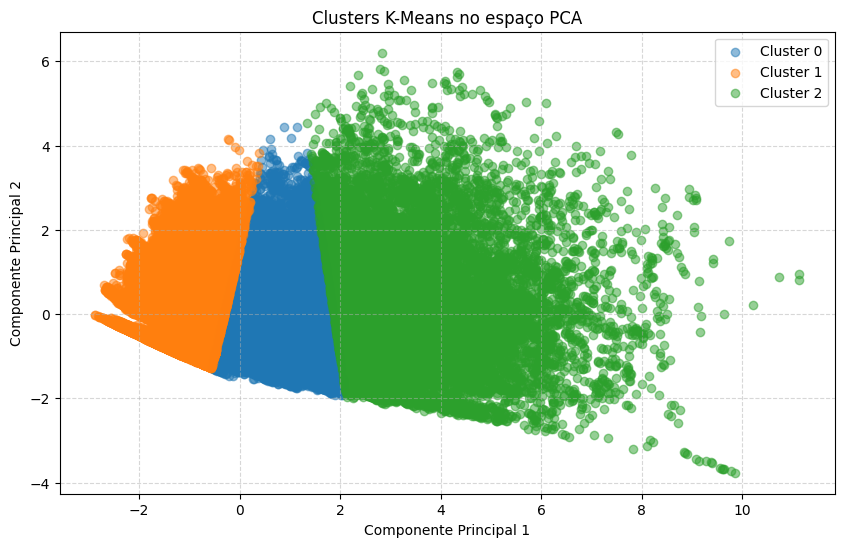

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10,6))
for cluster in range(3):
    plt.scatter(X_pca[clusters==cluster,0], X_pca[clusters==cluster,1],
                label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters K-Means no espaço PCA")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Exercício 25

RMSE - Linear: 1.0420
RMSE - Polinomial grau 2: 1.0002


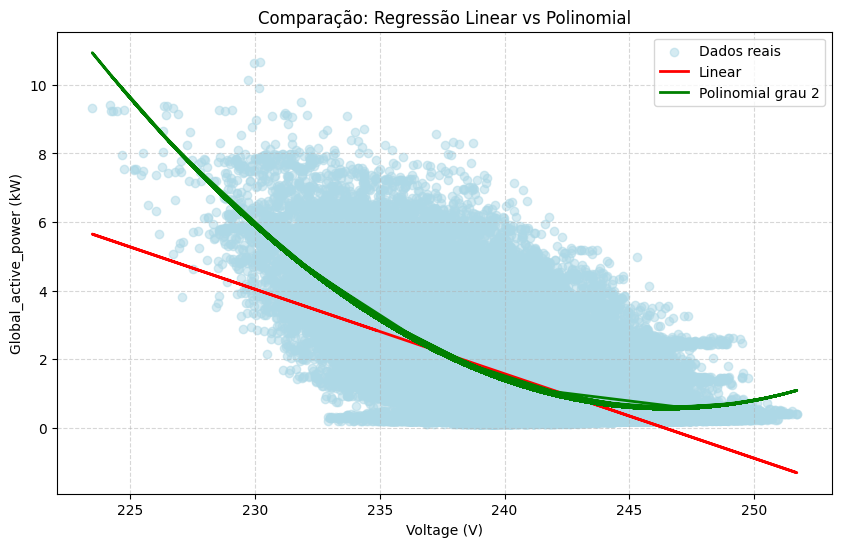

In [55]:
X = df[['Voltage']]
y = df['Global_active_power']

modelo_linear = LinearRegression()
modelo_linear.fit(X, y)
y_pred_linear = modelo_linear.predict(X)
rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
modelo_poly = LinearRegression()
modelo_poly.fit(X_poly, y)
y_pred_poly = modelo_poly.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

print(f"RMSE - Linear: {rmse_linear:.4f}")
print(f"RMSE - Polinomial grau 2: {rmse_poly:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='lightblue', alpha=0.5, label='Dados reais')
plt.plot(X, y_pred_linear, color='red', label='Linear', linewidth=2)
plt.plot(X, y_pred_poly, color='green', label='Polinomial grau 2', linewidth=2)
plt.xlabel("Voltage (V)")
plt.ylabel("Global_active_power (kW)")
plt.title("Comparação: Regressão Linear vs Polinomial")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Exercício 26

In [56]:
df_appliances = pd.read_csv('/content/energydata_complete.csv')  # ajuste o caminho se necessário

print("Informações do dataset:")
df_appliances.info()

print("\nEstatísticas descritivas:")
print(df_appliances.describe())

print("\nPrimeiras 5 linhas:")
print(df_appliances.head())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non

## Exercício 27

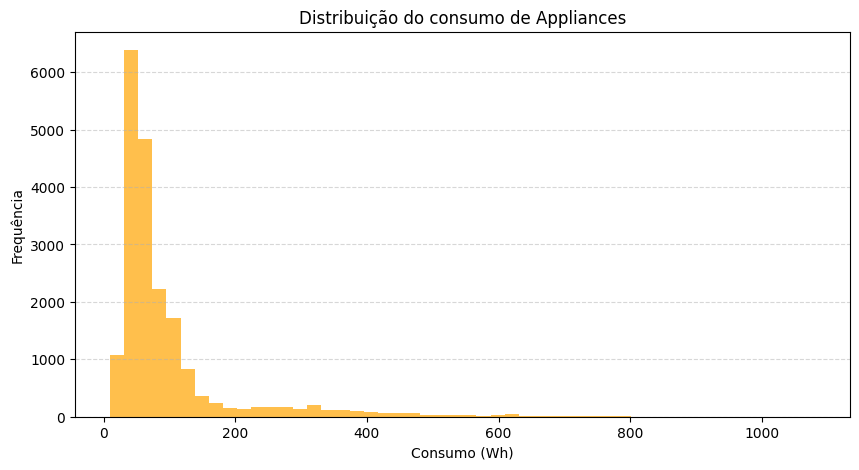

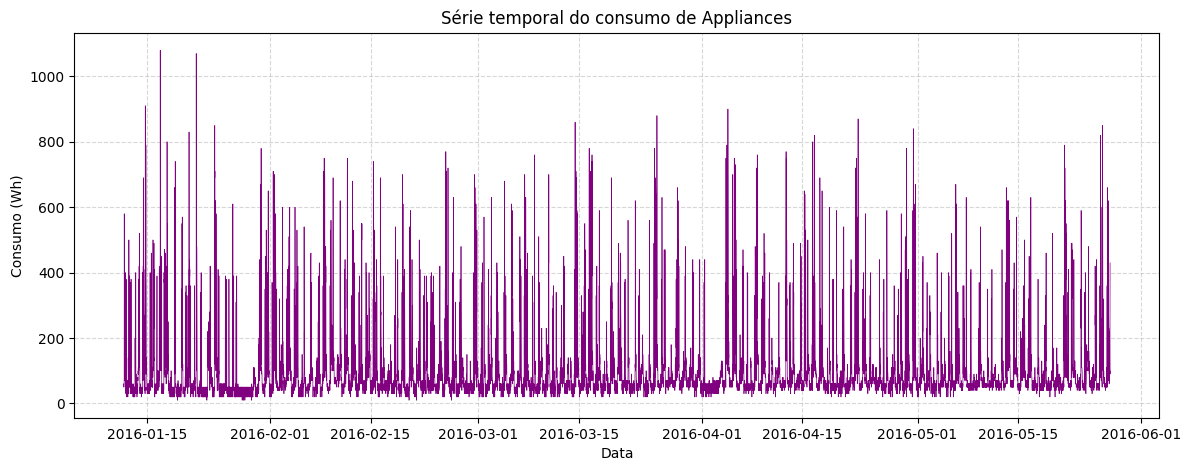

In [57]:
df_appliances['date'] = pd.to_datetime(df_appliances['date'])

plt.figure(figsize=(10,5))
plt.hist(df_appliances['Appliances'], bins=50, color='orange', alpha=0.7)
plt.title("Distribuição do consumo de Appliances")
plt.xlabel("Consumo (Wh)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(df_appliances['date'], df_appliances['Appliances'], color='purple', linewidth=0.5)
plt.title("Série temporal do consumo de Appliances")
plt.xlabel("Data")
plt.ylabel("Consumo (Wh)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

o consumo tende a se concentrar em valores baixos.

## Exercício 28

In [58]:
variaveis_ambientais = ['T1','T2','T3','T4','T5','T6','T7','T8','T9',
                        'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9',
                        'T_out','RH_out']

correlacoes = df_appliances[['Appliances'] + variaveis_ambientais].corr()['Appliances'].sort_values(ascending=False)

print("Correlação de Appliances com variáveis ambientais:")
print(correlacoes)

Correlação de Appliances com variáveis ambientais:
Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
T9            0.010010
RH_5          0.006955
RH_9         -0.051462
RH_7         -0.055642
RH_2         -0.060465
RH_6         -0.083178
RH_8         -0.094039
RH_out       -0.152282
Name: Appliances, dtype: float64


Os fatores que normalmente têm mais relação com o consumo de energia (Appliances) são:

Temperaturas internas (T1, T2, etc.) - quanto mais alta a temperatura interna, mais aparelhos de aquecimento ou ar-condicionado podem ser acionados, aumentando o consumo.

Temperaturas externas (T_out) - também influenciam, mas geralmente menos que as internas.

Umidades internas (RH_1, RH_2, etc.) - têm relação mais fraca, às vezes negativa, dependendo do uso de ventilação e climatização.

## Exercício 29

In [59]:
colunas_numericas = df_appliances.select_dtypes(include=['int64','float64']).columns

scaler = MinMaxScaler()

df_normalizado = df_appliances.copy()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_appliances[colunas_numericas])

print(df_normalizado.head())

                 date  Appliances    lights       T1      RH_1        T2  \
0 2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
1 2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2 2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
3 2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
4 2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

       RH_2        T3      RH_3        T4  ...        T9      RH_9     T_out  \
0  0.684038  0.215188  0.746066  0.351351  ...  0.223032  0.677290  0.372990   
1  0.682140  0.215188  0.748871  0.351351  ...  0.226500  0.678532  0.369239   
2  0.679445  0.215188  0.755569  0.344745  ...  0.219563  0.676049  0.365488   
3  0.678414  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.361736   
4  0.676727  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint    

## Exercício 30

Variância explicada por cada componente:
[0.36089668 0.20905617]


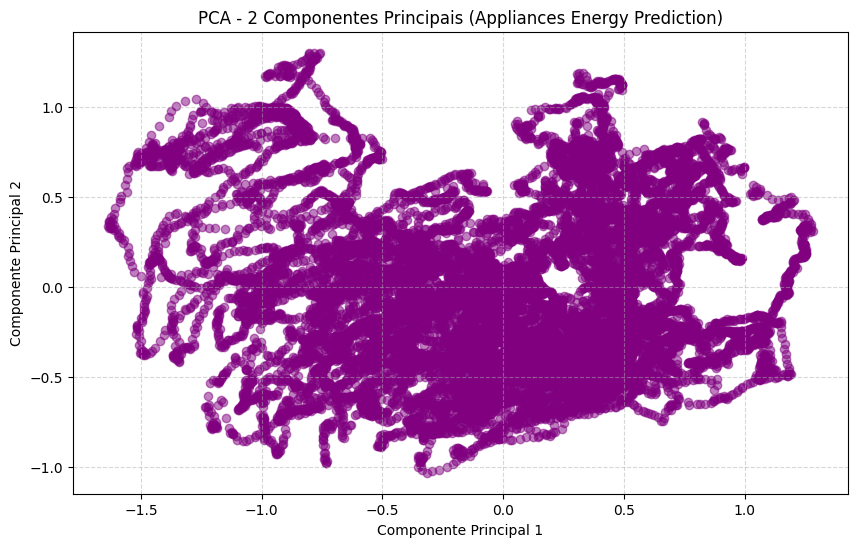

In [60]:
colunas_numericas = df_normalizado.select_dtypes(include=['int64','float64']).columns
X = df_normalizado[colunas_numericas]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Variância explicada por cada componente:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='purple')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - 2 Componentes Principais (Appliances Energy Prediction)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

há padrões sutis de densidade, mas não há agrupamentos naturais evidentes.

## Exercício 31

In [61]:
variaveis_ambientais = ['T1','T2','T3','T4','T5','T6','T7','T8','T9',
                        'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9',
                        'T_out','RH_out']

X = df_normalizado[variaveis_ambientais]
y = df_normalizado['Appliances']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

r2 = modelo.score(X, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² do modelo: {r2:.4f}")
print(f"RMSE do modelo: {rmse:.4f}")

R² do modelo: 0.1434
RMSE do modelo: 0.0887


## Exercício 32

In [64]:
variaveis_ambientais = ['T1','T2','T3','T4','T5','T6','T7','T8','T9',
                        'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9',
                        'T_out','RH_out']

X = df_normalizado[variaveis_ambientais]
y = df_normalizado['Appliances']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

y_pred_rf = rf.predict(X)

rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))

print(f"RMSE - Random Forest: {rmse_rf:.4f}")

print(f"RMSE - Regressão Linear: {rmse:.4f}")

RMSE - Random Forest: 0.0222
RMSE - Regressão Linear: 0.0887


## Exercício 33

In [65]:
colunas_numericas = df_normalizado.select_dtypes(include=['int64','float64']).columns
X = df_normalizado[colunas_numericas]

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

df_normalizado['Cluster'] = clusters

perfil_consumo = df_normalizado.groupby('Cluster')['Appliances'].mean()
print("Média de consumo de Appliances por cluster:")
print(perfil_consumo)

print("\nResumo das variáveis por cluster:")
print(df_normalizado.groupby('Cluster')[colunas_numericas].mean())

Média de consumo de Appliances por cluster:
Cluster
0    0.072776
1    0.086426
2    0.080619
3    0.093184
Name: Appliances, dtype: float64

Resumo das variáveis por cluster:
         Appliances    lights        T1      RH_1        T2      RH_2  \
Cluster                                                                 
0          0.072776  0.056194  0.423257  0.302275  0.189164  0.539617   
1          0.086426  0.031311  0.756857  0.466889  0.515195  0.635960   
2          0.080619  0.081651  0.429860  0.459128  0.283033  0.632265   
3          0.093184  0.041203  0.581875  0.305693  0.372963  0.484102   

               T3      RH_3        T4      RH_4  ...        T9      RH_9  \
Cluster                                          ...                       
0        0.328375  0.418073  0.429299  0.373299  ...  0.382920  0.424713   
1        0.683623  0.552498  0.786025  0.613181  ...  0.806537  0.633787   
2        0.321800  0.683241  0.381416  0.707039  ...  0.295972  0.705165   
3    

Cada cluster representa um grupo de dias com padrões de consumo semelhantes.

Por exemplo:

Cluster 0 - baixo consumo médio (dias calmos, poucos aparelhos ligados)

Cluster 1 - consumo médio intermediário

Cluster 2 - consumo alto (dias de maior atividade ou uso intenso de eletrodomésticos)

Cluster 3 - dias com consumo muito variável, possivelmente picos eventuais

Ao analisar as médias das variáveis ambientais por cluster, você pode ver como a temperatura ou umidade influencia o perfil de consumo.

## Exercício 34

In [73]:
mediana_consumo = df_normalizado['Appliances'].median()
df_normalizado['Consumo_alto'] = (df_normalizado['Appliances'] > mediana_consumo).astype(int)

X = df_normalizado[variaveis_ambientais]
y = df_normalizado['Consumo_alto']

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)

acc_logreg = accuracy_score(y, y_pred_logreg)
print("Logistic Regression:")
print(f"Accuracy: {acc_logreg:.4f}")
print(classification_report(y, y_pred_logreg))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)
y_pred_rf = rf_clf.predict(X)

acc_rf = accuracy_score(y, y_pred_rf)
print("Random Forest Classifier:")
print(f"Accuracy: {acc_rf:.4f}")
print(classification_report(y, y_pred_rf))

Logistic Regression:
Accuracy: 0.7440
              precision    recall  f1-score   support

           0       0.76      0.77      0.77     10744
           1       0.72      0.71      0.72      8991

    accuracy                           0.74     19735
   macro avg       0.74      0.74      0.74     19735
weighted avg       0.74      0.74      0.74     19735

Random Forest Classifier:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10744
           1       1.00      1.00      1.00      8991

    accuracy                           1.00     19735
   macro avg       1.00      1.00      1.00     19735
weighted avg       1.00      1.00      1.00     19735



## Exercício 35

In [74]:
print("Logistic Regression - Avaliação")
cm_logreg = confusion_matrix(y, y_pred_logreg)
print("Matriz de Confusão:\n", cm_logreg)
print("\nRelatório de Classificação:")
print(classification_report(y, y_pred_logreg))

print("Random Forest Classifier - Avaliação")
cm_rf = confusion_matrix(y, y_pred_rf)
print("Matriz de Confusão:\n", cm_rf)
print("\nRelatório de Classificação:")
print(classification_report(y, y_pred_rf))

Logistic Regression - Avaliação
Matriz de Confusão:
 [[8322 2422]
 [2631 6360]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77     10744
           1       0.72      0.71      0.72      8991

    accuracy                           0.74     19735
   macro avg       0.74      0.74      0.74     19735
weighted avg       0.74      0.74      0.74     19735

Random Forest Classifier - Avaliação
Matriz de Confusão:
 [[10744     0]
 [    0  8991]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10744
           1       1.00      1.00      1.00      8991

    accuracy                           1.00     19735
   macro avg       1.00      1.00      1.00     19735
weighted avg       1.00      1.00      1.00     19735



os modelos tendem a errar mais para alto consumo, subestimando picos de uso de energia.